In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats as stats
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['figure.figsize'] = (8, 6)
%config InlineBackend.figure_format = 'retina'

In [38]:
path_to_results = '/home/ng213/pazy_code/pazy-aepw3-results/01_Bending/'

In [39]:
bending_results = {}

In [46]:
bending_results['sharpy_w_skin'] = {'file': path_to_results + '/bending_SHARPy_w_skin.txt',
                                    'skin': True,
                                    'marker': 'o',
                                    'ms': 4,
                                   'label':'SHARPy'}
bending_results['sharpy_wo_skin'] = {'file': path_to_results + '//bending_SHARPy_wo_skin.txt',
                                     'skin': False,
                                     'marker': 'o',
                                     'ms': 4,
                                    'label': 'SHARPy'}
bending_results['um_w_skin'] = {'file': path_to_results + '/bending_UMNAST_w_skin.txt',
                                    'skin': True,
                                    'marker': '^',
                                    'ms': 4,
                                   'label':'UM/NAST'}
bending_results['um_wo_skin'] = {'file': path_to_results + '/bending_UMNAST_wo_skin.txt',
                                     'skin': False,
                                     'marker': '^',
                                     'ms': 4,
                                    'label': 'UM/NAST'}
bending_results['technion_mrm_w_skin'] = {'file': path_to_results + '/bending_Technion_MRM_w_skin.txt',
                                          'skin': True,
                                          'marker': 'x',
                                          'ms': 4,
                                         'label': 'MRM'}
bending_results['technion_mrm_wo_skin'] = {'file': path_to_results + '/bending_Technion_MRM_wo_skin.txt',
                                           'marker': 'x',
                                           'ms': 4,
                                           'skin': False,
                                          'label': 'MRM'}
# bending_results['abaqus'] = {'file': path_to_results + '/bending_SHARPy_parentFEM_wo_skin.txt',
#                              'skin': False,
#                              'marker': 's',
#                              'ms': 4,
#                              'ls': 'none',
#                             'label': 'Abaqus FEM'}
bending_results['nastran'] = {'file': path_to_results + '/bending_UMNAST_parentFEM_wo_skin.txt',
                             'skin': False,
                             'marker': 's',
                             'ms': 4,
                             'ls': 'none',
                            'label': 'Nastran FEM',
                             'linestyle': {'markevery': 5}}
bending_results['technion_experimental'] = {'file': path_to_results + '/bending_Technion_Experimental.txt',
                                            'skin': True,
                                           'label': 'Technion Experimental',
                                           'marker': 's',
                                            'ms': 4,
                                            'ls':'none'
                                           }

In [57]:
load_linear_limit = 1  #kg
for key, case in bending_results.items():
    case['data'] = np.loadtxt(case['file'])
    case['linear'] = stats.linregress(case['data'][case['data'][:, 0] < load_linear_limit, 0], case['data'][case['data'][:, 0] < load_linear_limit, 1])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


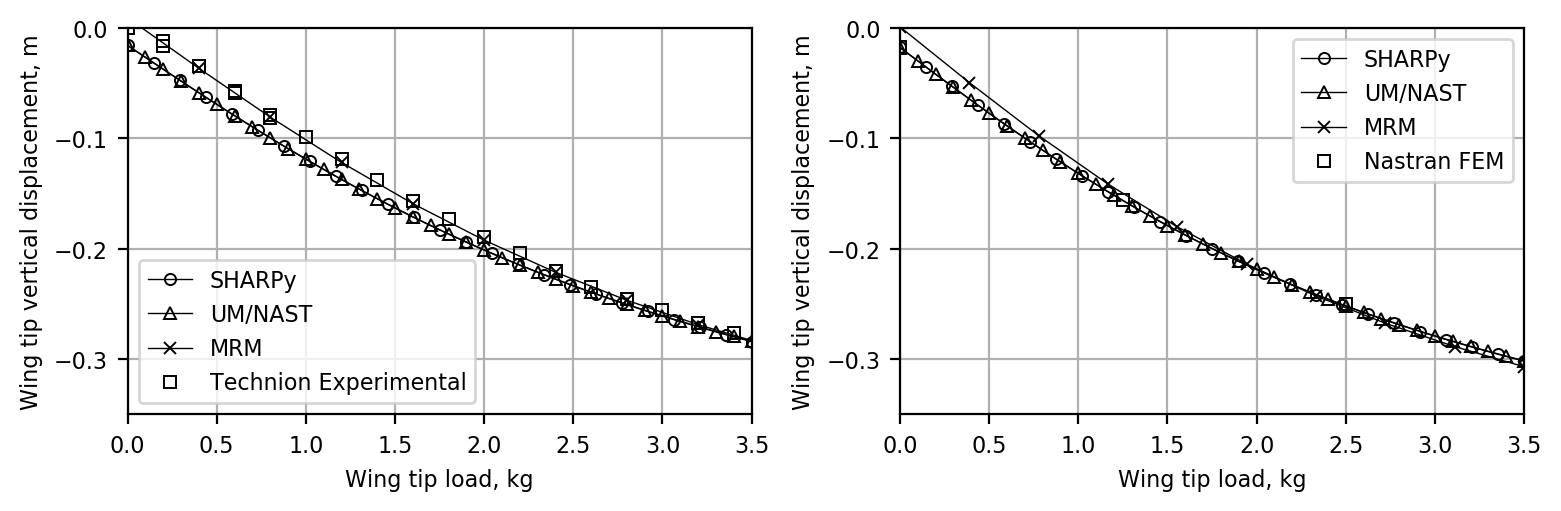

In [56]:
cm2in = 1/2.54
ar = 1.57
ar = 3
width_cm = 20

figsize = (width_cm * cm2in, width_cm / ar * cm2in)
fig, ax = plt.subplots(ncols=2, figsize=figsize)

for case in bending_results.values():
    if case['skin']:
        a = ax[0]
    else:
        a = ax[1]    
    
    a.plot(case['data'][:, 0], case['data'][:, 1], label=case['label'], marker=case['marker'], ms=case['ms'], mfc='none', ls=case.get('ls', '-'), 
           lw=0.5, color='k', markeredgewidth=0.7,
           **case.get('linestyle', {}))

for a in ax:
    a.legend(fontsize=8)
    a.set_xlabel('Wing tip load, kg')
    a.set_ylabel('Wing tip vertical displacement, m')
    a.grid()
    a.set_xlim(0, 3.5)
    a.set_ylim(-0.35, 0.)

    for item in ([a.title, a.xaxis.label, a.yaxis.label] +
             a.get_xticklabels() + a.get_yticklabels()):
        item.set_fontsize(8)

plt.tight_layout()
plt.savefig('../figures/02_Bending.eps')

In [62]:
print('Skin on')
for k, case in bending_results.items():
    if case['skin']:
        print('{:20s}\tslope = {:.2f} cm/kg \t intercept = {:.2f} cm'.format(k, case['linear'].slope * 100, case['linear'].intercept * 100))
    
print('\nSkin off')
for k, case in bending_results.items():
    if not case['skin']:
        print('{:20s}\tslope = {:.2f} cm/kg \t intercept = {:.2f} cm'.format(k, case['linear'].slope * 100, case['linear'].intercept * 100))

Skin on
sharpy_w_skin       	slope = -10.44 cm/kg 	 intercept = -1.63 cm
um_w_skin           	slope = -10.40 cm/kg 	 intercept = -1.64 cm
technion_mrm_w_skin 	slope = -11.24 cm/kg 	 intercept = 0.91 cm
technion_experimental	slope = -10.72 cm/kg 	 intercept = 0.67 cm

Skin off
sharpy_wo_skin      	slope = -11.57 cm/kg 	 intercept = -1.85 cm
um_wo_skin          	slope = -11.54 cm/kg 	 intercept = -1.86 cm
technion_mrm_wo_skin	slope = -12.67 cm/kg 	 intercept = 0.07 cm
nastran             	slope = -11.65 cm/kg 	 intercept = -1.81 cm


In [60]:
case['linear']

LinregressResult(slope=-0.10721715000000001, intercept=0.006695250000000003, rvalue=-0.9963103968545499, pvalue=5.351509978429494e-12, stderr=0.002920609265675542)